In [146]:
#Multi class classification strategy
#Comparing original kesler (one vs rest or one vs all)
#and
#all vs all method (ie picking any 2 classes at a time)

In [147]:
import os, struct
import matplotlib as plt
from array import array as pyarray
import numpy as np
import time
from pylab import *
import pandas as pd
from scipy.stats import multivariate_normal
import sys



In [148]:
X = np.array([2,2])
X = np.row_stack((X,[2,-2]))
X = np.row_stack((X,[-2,2]))

C = ['red','blue','black']
print "X",X


X [[ 2  2]
 [ 2 -2]
 [-2  2]]


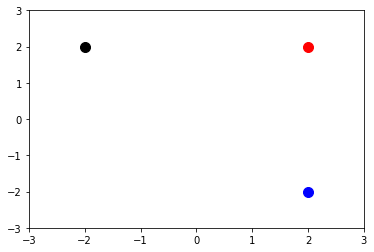

In [149]:
fig = plt.figure()
plt.scatter(X[0,0],X[0,1],s=100,color='red')
plt.scatter(X[1,0],X[1,1],s=100,color='blue')
plt.scatter(X[2,0],X[2,1],s=100,color='black')
plt.ylim([-3,3])
plt.xlim([-3,3])
    
plt.show()

In [150]:
T = np.array([1, -1, -1])
T = np.row_stack((T,[-1,1,-1]))
T = np.row_stack((T,[-1,-1,1]))
print "T",T

T [[ 1 -1 -1]
 [-1  1 -1]
 [-1 -1  1]]


In [151]:
O = np.array([1,1,1])
Xa = np.column_stack((O,X))
print "Xa",Xa

Xa [[ 1  2  2]
 [ 1  2 -2]
 [ 1 -2  2]]


In [152]:
Y = np.linalg.pinv(Xa)
Wr = np.dot(Y,T[:,0])
print Wr

[-1.   0.5  0.5]


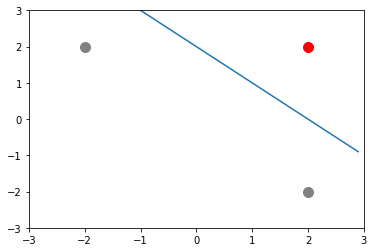

In [153]:
xx = np.arange(-3,3,0.1)
yy = (-Wr[0] - Wr[1]*xx)/Wr[2]
fig = plt.figure()
plt.plot(xx,yy)
plt.scatter(X[0,0],X[0,1],s=100,color='red')
plt.scatter(X[1,0],X[1,1],s=100,color='grey')
plt.scatter(X[2,0],X[2,1],s=100,color='grey')
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.show()

In [154]:
Y = np.linalg.pinv(Xa)
Wu = np.dot(Y,T[:,1])
print Wu

[  2.77555756e-16  -5.55111512e-17  -5.00000000e-01]


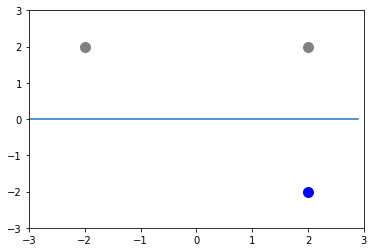

In [155]:
xx = np.arange(-3,3,0.1)
yy = (-Wu[0] - Wu[1]*xx)/Wu[2]
fig = plt.figure()
plt.plot(xx,yy)
plt.scatter(X[0,0],X[0,1],s=100,color='grey')
plt.scatter(X[1,0],X[1,1],s=100,color='blue')
plt.scatter(X[2,0],X[2,1],s=100,color='grey')
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.show()

In [156]:
Y = np.linalg.pinv(Xa)
Wk = np.dot(Y,T[:,2])
print Wk

[  1.11022302e-16  -5.00000000e-01   8.59551441e-17]


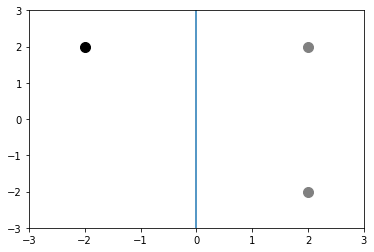

In [157]:
xx = np.arange(-3,3,0.1)
yy = (-Wk[0] - Wk[1]*xx)/Wk[2]
fig = plt.figure()
plt.plot(xx,yy)
plt.scatter(X[0,0],X[0,1],s=100,color='grey')
plt.scatter(X[1,0],X[1,1],s=100,color='grey')
plt.scatter(X[2,0],X[2,1],s=100,color='black')
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.show()

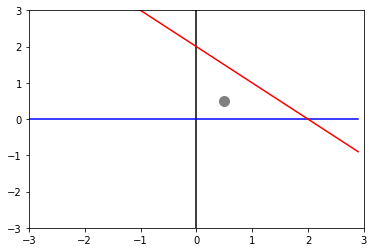

In [158]:
xx = np.arange(-3,3,0.1)
yyk = (-Wk[0] - Wk[1]*xx)/Wk[2]
yyu = (-Wu[0] - Wu[1]*xx)/Wu[2]
yyr = (-Wr[0] - Wr[1]*xx)/Wr[2]
fig = plt.figure()
plt.plot(xx,yyk,color='black')
plt.plot(xx,yyu,color='blue')
plt.plot(xx,yyr,color='red')

Z = [1 , 0.5 , 0.5]
plt.scatter(Z[1],Z[2],s=100,color='grey')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()


In [159]:

Tr = np.dot(Z,Wr)
Tu = np.dot(Z,Wu)
Tk = np.dot(Z,Wk)
Tpred=[Tr,Tu,Tk]
print "Tpred", Tpred
#first of all, Tr is the most -ve =>not red , it should be the other way round
#besides, Tk and Tu have the same value, so inconclusive

Tpred [-0.50000000000000022, -0.24999999999999981, -0.24999999999999978]


In [160]:
XRU = np.array([2,2])
XRU = np.row_stack((XRU,[2,-2]))
TRU = np.array([1,-1])
TRU = np.row_stack((TRU,[-1,1]))
print "XRU\n", XRU
print "TRU\n", TRU

XRU
[[ 2  2]
 [ 2 -2]]
TRU
[[ 1 -1]
 [-1  1]]


In [161]:
XaRU = np.column_stack(([1,1],XRU))
YRU = np.linalg.pinv(XaRU)
WRU = np.dot(YRU,TRU[:,0])
print "WRU", WRU

WRU [  4.16333634e-17  -2.77555756e-17   5.00000000e-01]


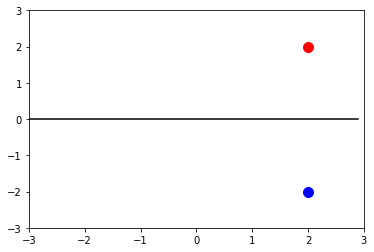

In [162]:
xx = np.arange(-3,3,0.1)
yy = (-WRU[0] - WRU[1]*xx)/WRU[2]
fig = plt.figure()
plt.plot(xx,yy,color='black')
plt.scatter(2,2,s=100,color='red')
plt.scatter(2,-2,s=100,color='blue')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [163]:
XRK = np.array([2,2])
XRK = np.row_stack((XRK,[-2,2]))
TRK = np.array([1,-1])
TRK = np.row_stack((TRK,[-1,1]))
print "XRK\n", XRK
print "TRK\n", TRK

XRK
[[ 2  2]
 [-2  2]]
TRK
[[ 1 -1]
 [-1  1]]


In [164]:
XaRK = np.column_stack(([1,1],XRK))
YRK = np.linalg.pinv(XaRK)
WRK = np.dot(YRK,TRK[:,0])
print "WRK", WRK

WRK [  4.16333634e-17   5.00000000e-01   2.77555756e-17]


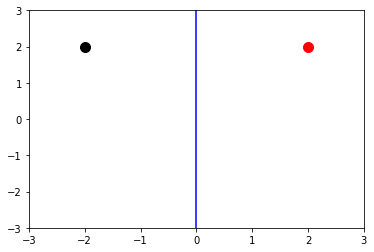

In [165]:
xx = np.arange(-3,3,0.1)
yy = (-WRK[0] - WRK[1]*xx)/WRK[2]
fig = plt.figure()
plt.plot(xx,yy,color='blue')
plt.scatter(2,2,s=100,color='red')
plt.scatter(-2,2,s=100,color='black')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [166]:
XKU = np.array([-2,2])
XKU = np.row_stack((XKU,[2,-2]))
TKU = np.array([1,-1])
TKU = np.row_stack((TKU,[-1,1]))
print "XKU\n", XKU
print "TKU\n", TKU

XKU
[[-2  2]
 [ 2 -2]]
TKU
[[ 1 -1]
 [-1  1]]


In [167]:
XaKU = np.column_stack(([1,1],XKU))
YKU = np.linalg.pinv(XaKU)
WKU = np.dot(YKU,TKU[:,0])
print "WKU", WKU

WKU [ -5.55111512e-17  -2.50000000e-01   2.50000000e-01]


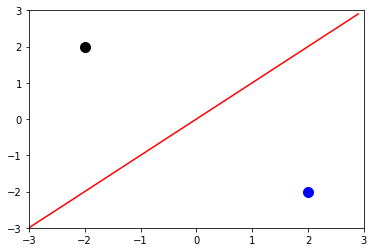

In [168]:
xx = np.arange(-3,3,0.1)
yy = (-WKU[0] - WKU[1]*xx)/WKU[2]
fig = plt.figure()
plt.plot(xx,yy,color='red')
plt.scatter(-2,2,s=100,color='black')
plt.scatter(2,-2,s=100,color='blue')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [169]:
Z = [1, 0.5, 0.5]
TRK = np.dot(Z,WRK)
print "TRK",TRK
TKU = np.dot(Z,WKU)
print "TKU", TKU
TRU = np.dot(Z,WRU)
print "TRU", TRU

#TPN - P is positive class N is negarive class  If TPN > 0, class is P.
#Then take a majority vote

TRK 0.25
TKU -5.55111512313e-17
TRU 0.25


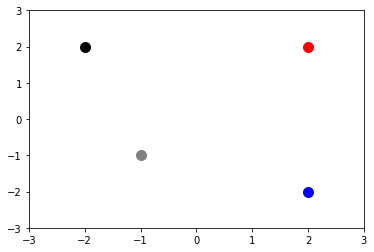

In [170]:
Z = [1, -1,-1]
fig = plt.figure()
plt.scatter(2,2,s=100,color='red')
plt.scatter(2,-2,s=100,color='blue')
plt.scatter(-2,2,s=100,color='black')
plt.scatter(Z[1],Z[2],s=100,color='grey')

plt.xlim(-3,3)
plt.ylim(-3,3)

plt.show()



In [171]:
Tpred_onevsall = [np.dot(Z,Wr),np.dot(Z,Wu),np.dot(Z,Wk)]
print Tpred_onevsall
#inconclusive, but atleast strongly confirms not red .
#expected since equally close to black and blue but very far from red

[-2.0000000000000004, 0.50000000000000044, 0.49999999999999989]


In [172]:
TRK = np.dot(Z,WRK)
TKU = np.dot(Z,WKU)
TRU = np.dot(Z,WRU)
print "TRK", TRK
print "TKU", TKU
print "TRU", TRU
# gives similar result


TRK -0.5
TKU -5.55111512313e-17
TRU -0.5


In [173]:
#How about computation time? 
#original method : N points * K kesler outputs = N*K, 
#with pseuodo inv matrix based classifier. It is almost close to N*1
#allvsall method
#Since this involves KC2 number of classifications performed over N/K points => N*(k-1) 
#what is the impact of fewer training points?

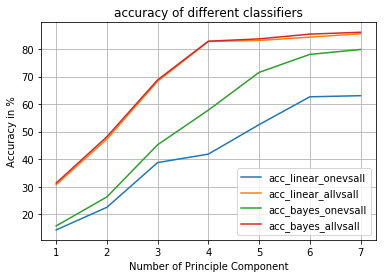

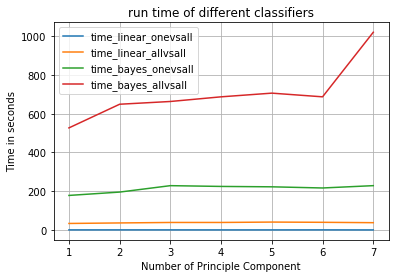

In [182]:
n = np.arange(1,8,1)
time_linear_onevsall = [0.96,1.04,0.99,0.89,0.91,1.06,0.78]
time_linear_allvsall = [34.08,36.74,39.2,39.25,41.22,40,38.08]
time_bayes_onevsall = [178.575,195.88,229,225,223,217,229]
time_bayes_allvsall = [526.8,648.8,663,687,706,687,1020]

acc_linear_onevsall = [14.31,22.53,38.77,41.84,52.55,62.66,63.07]
acc_linear_allvsall = [30.7,47.3,68.3,82.75,83.14,84.33,85.57]
acc_bayes_onevsall = [15.76,26.3,45.24,57.82,71.53,78.06,79.85]
acc_bayes_allvsall = [31.33,48.14,68.81,82.86,83.7,85.42,86.11]


plt.plot(n,acc_linear_onevsall,label="acc_linear_onevsall")
plt.plot(n,acc_linear_allvsall,label="acc_linear_allvsall")
plt.plot(n,acc_bayes_onevsall,label="acc_bayes_onevsall")
plt.plot(n,acc_bayes_allvsall,label="acc_bayes_allvsall")
plt.ylabel("Accuracy in %")
plt.xlabel("Number of Principle Component")
plt.title("accuracy of different classifiers")
plt.grid("on")
plt.legend()

plt.show()

fig = plt.figure()
plt.plot(n,time_linear_onevsall,label="time_linear_onevsall")
plt.plot(n,time_linear_allvsall,label="time_linear_allvsall")
plt.plot(n,time_bayes_onevsall,label="time_bayes_onevsall")
plt.plot(n,time_bayes_allvsall,label="time_bayes_allvsall")
plt.ylabel("Time in seconds")
plt.xlabel("Number of Principle Component")
plt.title("run time of different classifiers")
plt.grid("on")
plt.legend()
plt.show()